## 1. Write a program that uses an if-else ladder

In [24]:
num = int(input("Enter a number"))
if num > 0:
    print(num, "is a positive number.")
elif num==0:
    print(num,"zero")
else:
    print(num, "is a negative number")



Enter a number-90
-90 is a negative number


## 2. Write five different functions and call them in one program

In [26]:
class b_a:
    def __init__(self):
        self.balance=0
        print("Bank Account details")
    def deposit(self):
        amt=float(input("enter amt to be deposited"))
        self.balance+=amt
        print("Amount deposited",amt)
        
    def withdraw(self):
        amt=float(input("enter amt to be deposited"))
        if self.balance>=amt:
            self.balance-=amt
            print("Amt withdrawn",amt)
        else:
            print("Sorry, no balance")
            
    def balance1(self):
        print("Net balance",self.balance)
        
ob=b_a()
j=int(input("Enter no of transactions"))
for i in range(j):
    
    n=str(input("What do you wanna do?  Deposit(d), Withdraw(w), type accordingly"))
    if n=='d':
        ob.deposit()
    elif n=='w':
        ob.withdraw()
    else:
        print("Wrong input")
    ob.balance1()

Bank Account details
Enter no of transactions3
What do you wanna do?  Deposit(d), Withdraw(w), type accordinglyd
enter amt to be deposited1000
Amount deposited 1000.0
Net balance 1000.0
What do you wanna do?  Deposit(d), Withdraw(w), type accordinglyw
enter amt to be deposited500
Amt withdrawn 500.0
Net balance 500.0
What do you wanna do?  Deposit(d), Withdraw(w), type accordinglyw
enter amt to be deposited100
Amt withdrawn 100.0
Net balance 400.0


## 3. Read any dataset from https://archive.ics.uci.edu/ml/index.php and perform a missing value 
treatment, check for distribution of each variable, find the correlation matrix and write 
conclusions from the matrix.

### Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset

In [37]:
import pandas as pd
import numpy as np
df=pd.read_csv('adult.csv')
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [38]:
df.shape

(32560, 15)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Missing values

In [64]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
# No missing values

In [62]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [65]:
num= [i for i in df.columns if df[i].dtype!='O']
num

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [67]:
for i in num:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
 fnlwgt  :  21647
 education-num  :  16
 capital-gain  :  119
 capital-loss  :  92
 hours-per-week  :  94


C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


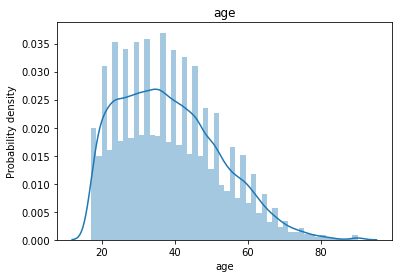

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


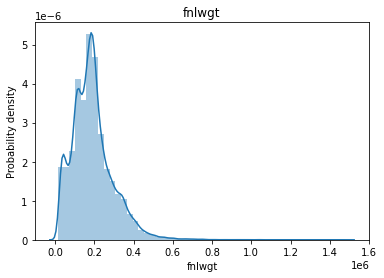

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


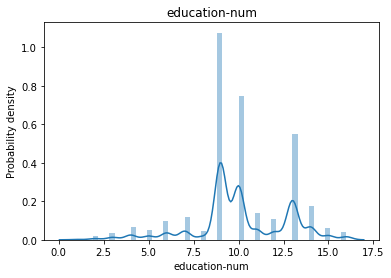

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


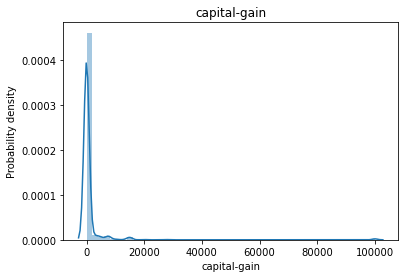

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


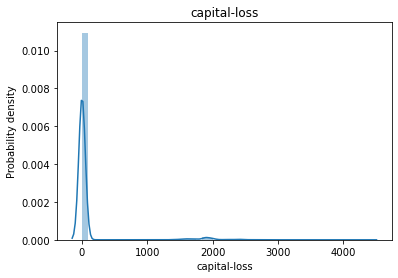

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


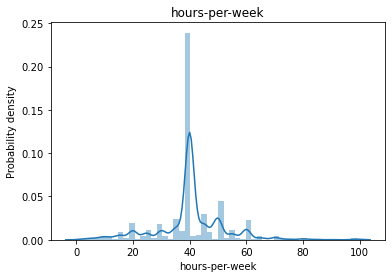

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in num:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [ ]:
# we observe that education has discrete values
# we see that capital gain and loss have many values as 0

In [ ]:
#to normalise the data

In [74]:
df["age"] = np.log(df["age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


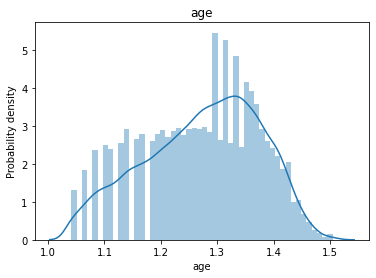

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


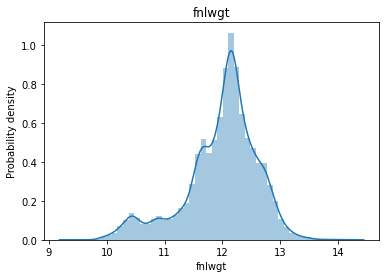

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


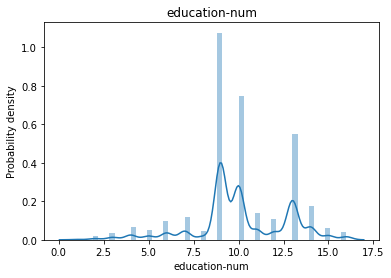

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


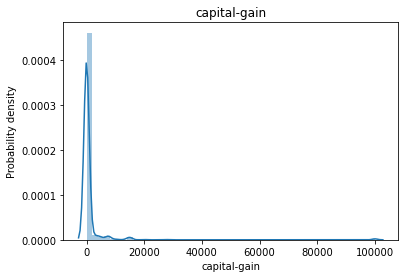

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


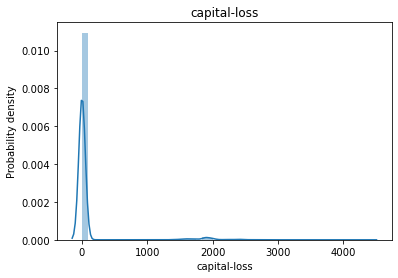

C:\Users\rashm\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


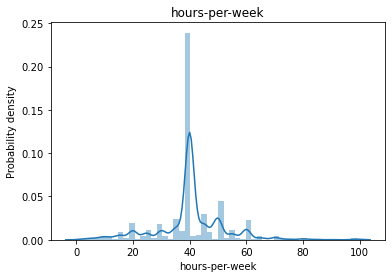

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
for feature in num:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

#### categorical

In [76]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [79]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 native-country  :  42
 income  :  2


In [81]:
df["occupation"].mode()[0]

' Prof-specialty'

In [82]:
df["workclass"].mode()[0] 

' Private'

In [83]:
df['native-country'].mode()[0] 

' United-States'

In [84]:
df["workclass"] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['native-country'] = df['native-country'].str.replace('?', 'United-States' )

<ipython-input-84-d35999431f00>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["workclass"] = df['workclass'].str.replace('?', 'Private' )
<ipython-input-84-d35999431f00>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
<ipython-input-84-d35999431f00>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['native-country'] = df['native-country'].str.replace('?', 'United-States' )


In [88]:
df.loc[32414]

age                             1.397
workclass            Self-emp-not-inc
fnlwgt                      11.083373
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     50
native-country          United-States
income                           >50K
Name: 32414, dtype: object

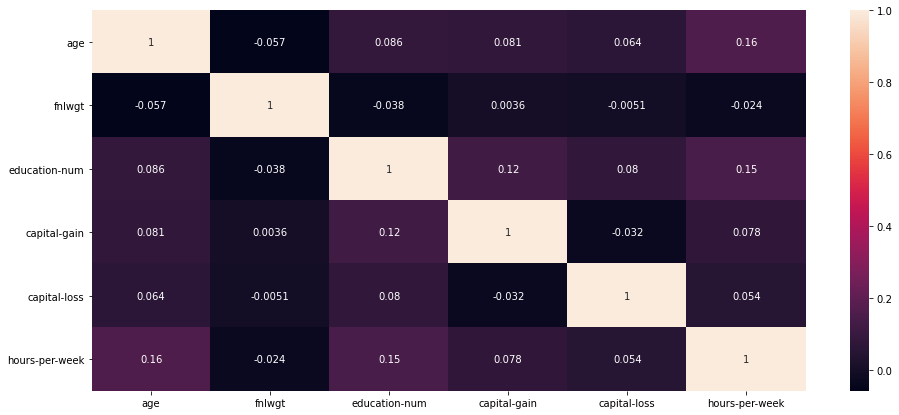

In [80]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [ ]:
# There exists a negative corr btw capital gain and capital loss
# There exists a negative corr btw fnlwgt and hours-per week are the observable factors


### 4. Read a dataset and perform slice it in different ways (

In [90]:
df.loc[2]

age                           1.37884
workclass                     Private
fnlwgt                      12.366153
education                        11th
education-num                       7
marital-status     Married-civ-spouse
occupation          Handlers-cleaners
relationship                  Husband
race                            Black
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country          United-States
income                          <=50K
Name: 2, dtype: object

In [92]:
df.iloc[:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1.364055,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1.291320,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,1.378840,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,1.203634,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,1.283962,Private,12.558777,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [93]:
df.iloc[::5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1.364055,Self-emp-not-inc,11.330336,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
5,1.358877,Private,11.984097,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
10,1.224128,State-gov,11.858619,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
15,1.169032,Self-emp-not-inc,12.082526,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
20,1.383537,Private,12.618666,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32535,1.260266,Private,11.984278,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32540,1.311994,Private,12.220084,HS-grad,9,Separated,Prof-specialty,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32545,1.283962,Private,12.197113,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32550,1.242925,Private,10.436055,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K


In [94]:
df.iloc[2:5]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,1.378840,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,1.203634,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,1.283962,Private,12.558777,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [100]:
df.iloc[[1, 3, 5], [1, 3]]

,workclass,education
1,Private,HS-grad
3,Private,Bachelors
5,Private,9th


In [101]:
df.loc[[1, 2, 3]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,1.291320,Private,12.281393,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,1.378840,Private,12.366153,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,1.203634,Private,12.732011,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Can we find correlation between two categorical variables? How?

In [ ]:
Yes, we calculate by converting categorical into numeric 

1. Tetrachoric Correlation: Used to calculate the correlation between binary categorical variables.

2. Polychoric Correlation: Used to calculate the correlation between ordinal categorical variables.

3. Cramer’s V: Used to calculate the correlation between nominal categorical variables.